In [1]:
!which python

/Users/noahgundotra/opt/anaconda3/bin/python


In [7]:
import math
import solana.rpc.api as web3
import numpy as np

roots: 32 * MAX_SIZE

change_logs: ((32 * MAX_DEPTH) + 4) * MAX_SIZE

active_index: 8

buffer_size: 8

In [21]:
def get_client(nickname="mainnet-beta"):
    return web3.Client(f"https://api.{nickname}.solana.com")
    
def get_size(max_depth=20, max_size=64):
    return 32 * max_size + ((32 * max_depth) + 4) * max_size + 8 + 8 

def get_min_balance(client, size):
    """Returns in SOL"""
    return client.get_minimum_balance_for_rent_exemption(size)['result'] / 1e9

In [24]:
client = get_client()
depths = np.arange(10, 20)
rents = np.array([get_min_balance(client, int(get_size(depth))) for depth in depths])

In [22]:
import matplotlib.pyplot as plt

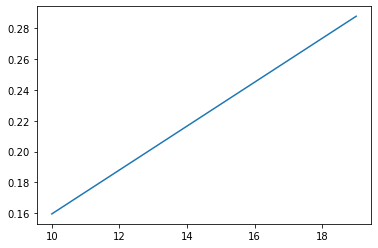

In [23]:
plt.plot(depths, rents)

In [32]:
num_leaves = np.arange(1e6)

In [31]:
leaves = np.ceil(np.log2(leaves))

/var/folders/5k/f5mb8ncx4hjbc9rw72q9zgs80000gn/T/ipykernel_67208/1251670123.py:1: RuntimeWarning: divide by zero encountered in log2
  leaves = np.ceil(np.log2(leaves))


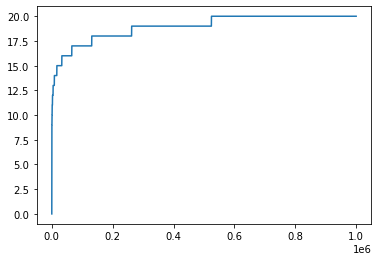

In [33]:
plt.plot(num_leaves,leaves)

In [34]:
depths = np.unique(leaves)

In [36]:
depths[depths > 0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [60]:
def cost_per_nft(client, num_leaves):
    depths = np.ceil(np.log2(num_leaves))
    uniq_depths = np.unique(depths[depths > 0])

    print("Uniq depths:\t", uniq_depths)
    cost_per_depth = np.array([get_min_balance(client, int(get_size(depth))) for depth in uniq_depths])
    print("Cost per depth:\t", cost_per_depth)

    depth_cost = dict(zip(uniq_depths, cost_per_depth))
    depth_to_cost = np.vectorize(lambda x: depth_cost[x])

    cost_for_leaves = depth_to_cost(depths) / num_leaves

    plt.plot(num_leaves, cost_for_leaves)

In [54]:
mapped = { 1: -1, 2: -2, 3: -3}
f = np.vectorize(lambda x: mapped[x])
f(np.array([1, 2, 3]))

array([-1, -2, -3])

Uniq depths:	 [17. 18. 19. 20.]
Cost per depth:	 [0.25935744 0.27361152 0.2878656  0.30211968]


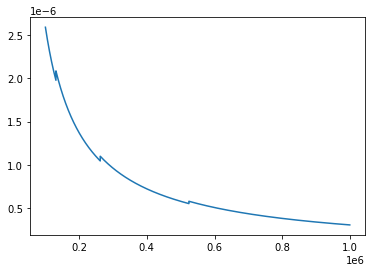

In [62]:

plot_cost_per_nft(client, np.arange(1e5, 1e6))

In [ ]:

export const mintData = {
  keypair: Keypair.fromSecretKey(
    Uint8Array.from([
      97, 21, 76, 200, 56, 16, 78, 25, 59, 220, 117, 51, 38, 49, 39, 120, 233,
      84, 140, 17, 127, 125, 155, 145, 90, 125, 125, 189, 208, 31, 187, 52, 29,
      36, 15, 160, 229, 149, 182, 246, 242, 216, 89, 158, 112, 1, 158, 51, 2,
      182, 99, 89, 98, 192, 25, 176, 229, 214, 207, 93, 58, 65, 146, 217,
    ])
  ),
};

export const adminData = {
  keypair: Keypair.fromSecretKey(
    Uint8Array.from([
      241, 176, 77, 159, 26, 214, 0, 223, 75, 201, 105, 22, 211, 58, 201, 142,
      249, 21, 200, 44, 120, 253, 15, 88, 138, 74, 111, 71, 20, 161, 164, 55,
      139, 59, 28, 117, 31, 84, 68, 106, 231, 132, 221, 59, 140, 70, 149, 140,
      155, 241, 161, 143, 160, 86, 215, 231, 246, 245, 191, 96, 10, 171, 192,
      191,
    ])
  ),
};


In [63]:

secret_key = [
    241, 176, 77, 159, 26, 214, 0, 223, 75, 201, 105, 22, 211, 58, 201, 142,
    249, 21, 200, 44, 120, 253, 15, 88, 138, 74, 111, 71, 20, 161, 164, 55,
    139, 59, 28, 117, 31, 84, 68, 106, 231, 132, 221, 59, 140, 70, 149, 140,
    155, 241, 161, 143, 160, 86, 215, 231, 246, 245, 191, 96, 10, 171, 192,
    191
]

In [64]:
import solana

In [65]:
key = solana.keypair.Keypair(secret_key[:32])

In [66]:
key.public_key

ANVwzkFb15qTMoAa7MsVKLCnRM7UDubBPUgHQwtYZ4sp